# Project One

Team Members:





Project Description 

# Initial Code

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

## Get data 

In [2]:
climate_df = pd.read_csv("climate_data.csv")
energy_df = pd.read_csv("energy_data.csv")
energy_cost_df = pd.read_csv("Tariffs_n_dates.csv")
production_df = pd.read_csv("production_data.csv")

# Unpivot raw energy data.
energy_df = energy_df.melt(id_vars=['Time stamp'],
                     var_name='device',
                     value_name='energy')
energy_df = energy_df.sort_values("Time stamp")

## Merge hourly data 

In [3]:
# Energy and Cost data
hourly_data = pd.merge(energy_df, energy_cost_df, how='left',
                      on="Time stamp")
hourly_data = hourly_data[["Time stamp",  "Date", "device", "energy","Price"]]
hourly_data["Total Cost"] = (hourly_data["energy"] 
                             * hourly_data["Price"])
hourly_data = hourly_data.drop("Price", axis=1)
hourly_data = hourly_data.sort_values("Date")
hourly_data.head()

,Time stamp,Date,device,energy,Total Cost
0,01/01/2020 00:00,01/01/2020,COMP_REF1,0.0000,0.000000
195,01/01/2020 16:00,01/01/2020,COMP_REF9,1.4900,2.474294
194,01/01/2020 16:00,01/01/2020,TUNEL1,0.1372,0.227834
193,01/01/2020 16:00,01/01/2020,TUNEL3,0.2318,0.384927
192,01/01/2020 16:00,01/01/2020,COMP_REF4,0.2772,0.460318


## Daily data 

In [4]:
# Energy, Production, Climate and Cost data
daily_data = hourly_data.groupby(by=["Date","device"], as_index=False).sum()
daily_data = pd.merge(daily_data, production_df, 
                      how='left', on='Date')
daily_data = pd.merge(daily_data, climate_df, 
                      how='left', on='Date')
daily_data["Date"] = pd.to_datetime(daily_data["Date"], dayfirst=True,  format="%d/%m/%Y")
daily_data.sort_values(by="Date", inplace=True)
daily_data.reset_index(drop=True, inplace=True)
daily_data.head()

,Date,device,energy,Total Cost,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
0,2019-03-01,COMP_REF1,6162.9256,8663.348872,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
1,2019-03-01,TUNEL3,5078.9900,7288.358004,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2,2019-03-01,TUNEL2,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
3,2019-03-01,TUNEL1,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
4,2019-03-01,COMP_REF9,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0


# Analysis 

## What are the main climate variables that affect the factory production? 

In [87]:
# José/Jorge

In [4]:
# Graficar producto A y B VS Climate 

In [9]:
from scipy.stats import linregress
import scipy.stats as st

In [54]:
def scatter_plot(xvalues, yvalues, zvalues):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    (slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(xvalues, zvalues)
    regress_values = xvalues * slope + intercept
    regress_values_z = xvalues * slope2 + intercept2
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    line_eq_2 = "z = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
    plt.figure(figsize=(10,6))
    plt.plot(xvalues,regress_values,"r-")
    plt.plot(xvalues,regress_values_z,"b-")
    if xvalues.min() < 0:
        lim_x_annot = xvalues.min()/3*2
    else:
        lim_x_annot = xvalues.max()/3
    plt.annotate(line_eq,(lim_x_annot,yvalues.max()/3),fontsize=15,color="black")
    plt.annotate(line_eq_2,(lim_x_annot,yvalues.max()/3*2),fontsize=15,color="black")
    plt.scatter(xvalues, yvalues, color="red", alpha=0.5)
    plt.scatter(xvalues, zvalues, color="blue", alpha=0.5)
    plt.ylim(yvalues.min()*(-1.1),yvalues.max()*1.1)
    plt.grid(True)

In [55]:
grouped_data = daily_data.groupby("Date")[["Product_A","Product_B","Temp", "UV", 'PrecMM', 'Hum', 'Heat', 'DP', 'WChill', 'FLike']].mean()
grouped_data

,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
Date,,,,,,,,,,
2019-03-01,357800.0,340036.200,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2019-03-02,323960.0,314865.300,21.0,6.0,0.0,37.0,20.0,3.0,20.0,20.0
2019-03-03,78460.0,20084.850,22.0,6.0,0.0,30.0,23.0,0.0,22.0,23.0
2019-03-04,200500.0,394474.275,22.0,6.0,0.0,34.0,22.0,2.0,22.0,22.0
2019-03-05,303460.0,425879.850,21.0,6.0,0.0,38.0,21.0,4.0,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,468050.0,455990.900,20.0,5.0,0.0,34.0,20.0,2.0,20.0,20.0
2020-02-26,417640.0,431775.900,18.0,5.0,0.0,45.0,18.0,5.0,17.0,17.0
2020-02-27,377125.0,410920.426,13.0,4.0,0.0,49.0,14.0,2.0,13.0,13.0


In [85]:
print("Product A Vs Temperature")
corr=round(st.pearsonr(daily_data["Temp"],daily_data["Product_A"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["Temp"],daily_data["Product_A"])
print(f"The {Lin_Reg}")
print("Product B Vs Temperature")
corr=round(st.pearsonr(daily_data["Temp"],daily_data["Product_B"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["Temp"],daily_data["Product_B"])
print(f"The {Lin_Reg}")

Product A Vs Temperature
The correlation is 0.01
The LinregressResult(slope=297.43925629097123, intercept=290906.7702920019, rvalue=0.008205678099851964, pvalue=0.5866737963514831, stderr=547.0624783966905)
Product B Vs Temperature
The correlation is -0.01
The LinregressResult(slope=-510.3642251607051, intercept=326970.64977782854, rvalue=-0.011358102223937608, pvalue=0.4517287595498416, stderr=678.1319020141176)


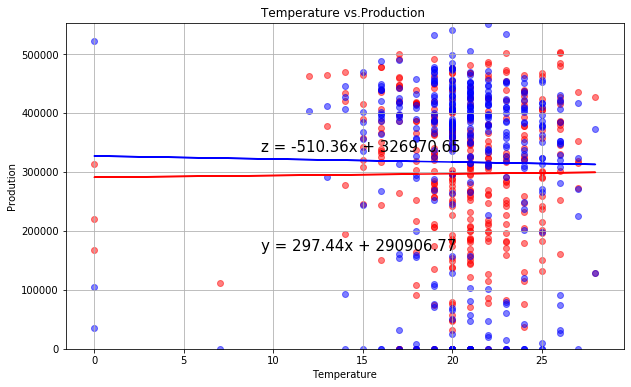

In [66]:
x_values = grouped_data["Temp"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.title(f"Temperature vs.Production ")
plt.xlabel("Temperature")
plt.ylabel("Prodution")
plt.show()

In [86]:
print("Product A Vs UV")
corr=round(st.pearsonr(daily_data["UV"],daily_data["Product_A"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["UV"],daily_data["Product_A"])
print(f"The {Lin_Reg}")
print("Product B Vs UV")
corr=round(st.pearsonr(daily_data["UV"],daily_data["Product_B"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["UV"],daily_data["Product_B"])
print(f"The {Lin_Reg}")

Product A Vs UV
The correlation is 0.06
The LinregressResult(slope=9292.532665648287, intercept=246730.56217308948, rvalue=0.0648953023911913, pvalue=1.6769222451955644e-05, stderr=2156.6126625338525)
Product B Vs UV
The correlation is -0.03
The LinregressResult(slope=-5832.882822529181, intercept=348040.01560226857, rvalue=-0.03286031901194177, pvalue=0.029428922402544, stderr=2677.5933090230933)


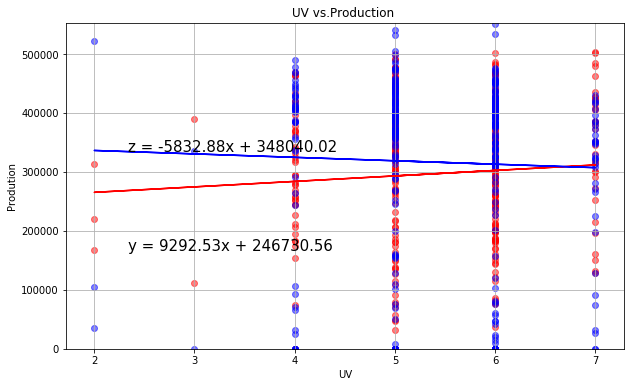

In [67]:
x_values = grouped_data["UV"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.title(f"UV vs.Production ")
plt.xlabel("UV")
plt.ylabel("Prodution")
plt.show()

In [87]:
print("Product A Vs Humidity")
corr=round(st.pearsonr(daily_data["Hum"],daily_data["Product_A"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["Hum"],daily_data["Product_A"])
print(f"The {Lin_Reg}")
print("Product B Vs Humidity")
corr=round(st.pearsonr(daily_data["Hum"],daily_data["Product_B"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["Hum"],daily_data["Product_B"])
print(f"The {Lin_Reg}")

Product A Vs Humidity
The correlation is -0.33
The LinregressResult(slope=-2350.058283162385, intercept=414857.4112576856, rvalue=-0.32538006672795156, pvalue=7.75517738256719e-109, stderr=103.07544803493295)
Product B Vs Humidity
The correlation is 0.07
The LinregressResult(slope=643.2557782346097, intercept=284216.7159907559, rvalue=0.07184645860078609, pvalue=1.8770941515764134e-06, stderr=134.77901297514993)


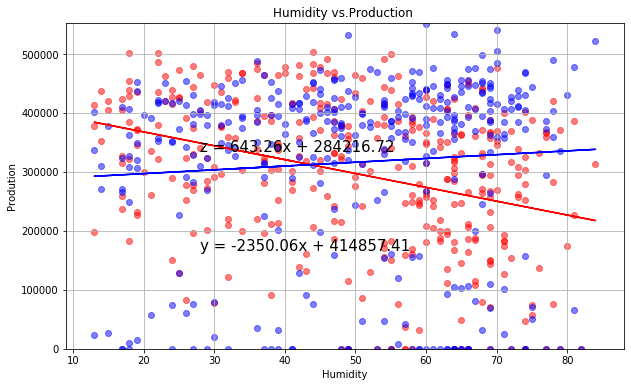

In [68]:
x_values = grouped_data["Hum"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.title(f"Humidity vs.Production ")
plt.xlabel("Humidity")
plt.ylabel("Prodution")
plt.show()

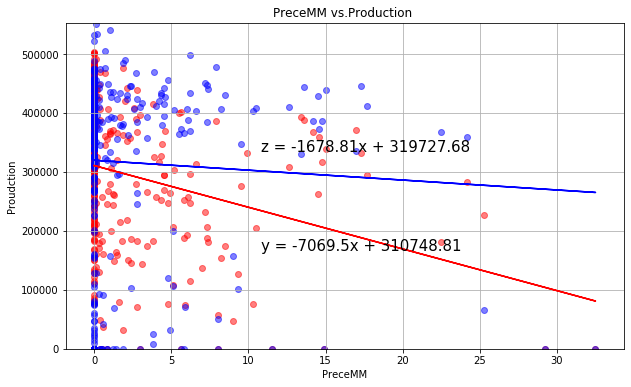

In [70]:
x_values = grouped_data["PrecMM"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.title(f"PreceMM vs.Production ")
plt.xlabel("PreceMM")
plt.ylabel("Proudction")
plt.show()

In [88]:
print("Product A Vs Heat")
corr=round(st.pearsonr(daily_data["Heat"],daily_data["Product_A"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["Heat"],daily_data["Product_A"])
print(f"The {Lin_Reg}")

print("Product B Vs Heat")
corr=round(st.pearsonr(daily_data["Heat"],daily_data["Product_B"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["Heat"],daily_data["Product_B"])
print(f"The {Lin_Reg}")

Product A Vs Heat
The correlation is -0.04
The LinregressResult(slope=-1880.468523918464, intercept=335705.0820056235, rvalue=-0.04135264904516568, pvalue=0.006126706364264028, stderr=685.7389592949704)
Product B Vs Heat
The correlation is -0.05
The LinregressResult(slope=-2697.267099040976, intercept=371947.35399065696, rvalue=-0.04784874832049004, pvalue=0.001514167951945209, stderr=849.8130268034873)


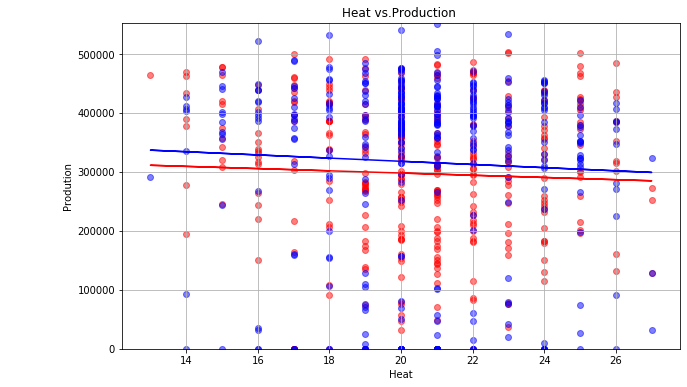

In [71]:
x_values = grouped_data["Heat"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.title(f"Heat vs.Production ")
plt.xlabel("Heat")
plt.ylabel("Prodution")
plt.show()

In [89]:
print("Product A Vs DP")
corr=round(st.pearsonr(daily_data["DP"],daily_data["Product_A"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["DP"],daily_data["Product_A"])
print(f"The {Lin_Reg}")

print("Product B Vs DP")
corr=round(st.pearsonr(daily_data["DP"],daily_data["Product_B"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["DP"],daily_data["Product_B"])
print(f"The {Lin_Reg}")

Product A Vs DP
The correlation is -0.36
The LinregressResult(slope=-7828.341853242652, intercept=354541.81477969803, rvalue=-0.3578348807224884, pvalue=8.12721640247941e-133, stderr=308.31999250295917)
Product B Vs DP
The correlation is 0.06
The LinregressResult(slope=1546.6182367325905, intercept=305106.143170563, rvalue=0.0570302631836926, pvalue=0.00015587304871259115, stderr=408.6373687363796)


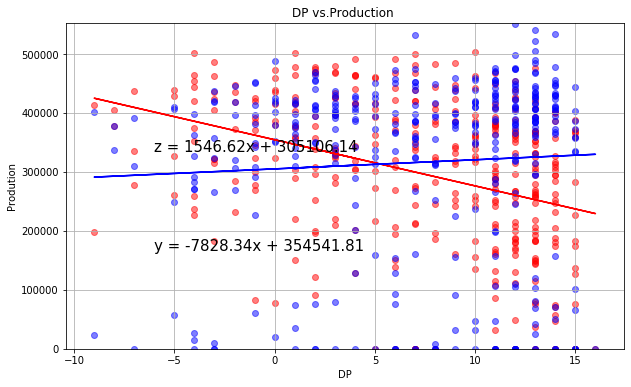

In [72]:
x_values = grouped_data["DP"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.title(f"DP vs.Production ")
plt.xlabel("DP")
plt.ylabel("Prodution")
plt.show()

In [92]:
print("Product A Vs Wind Chill")
corr=round(st.pearsonr(daily_data["WChill"],daily_data["Product_A"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["WChill"],daily_data["Product_A"])
print(f"The {Lin_Reg}")

print("Product B Vs Wind Chill")
corr=round(st.pearsonr(daily_data["WChill"],daily_data["Product_B"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["WChill"],daily_data["Product_B"])
print(f"The {Lin_Reg}")

Product A Vs Wind Chill
The correlation is -0.01
The LinregressResult(slope=-453.7686653326018, intercept=306225.14397295786, rvalue=-0.010450023620781153, pvalue=0.48870658645840204, stderr=655.3318202440028)
Product B Vs Wind Chill
The correlation is -0.07
The LinregressResult(slope=-3528.6521214056534, intercept=387996.6528079468, rvalue=-0.06555426818916121, pvalue=1.3746994246934498e-05, stderr=810.6631650210153)


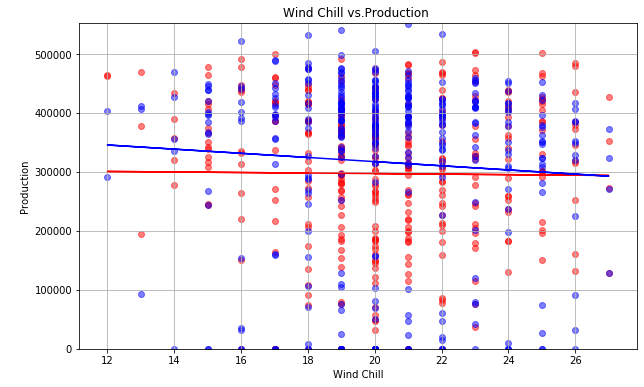

In [93]:
x_values = grouped_data["WChill"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.title(f"Wind Chill vs.Production ")
plt.xlabel("Wind Chill")
plt.ylabel("Production")
plt.show()

In [96]:
print("Product A Vs FLike")
corr=round(st.pearsonr(daily_data["FLike"],daily_data["Product_A"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["FLike"],daily_data["Product_A"])
print(f"The {Lin_Reg}")

print("Product B Vs FLike")
corr=round(st.pearsonr(daily_data["FLike"],daily_data["Product_B"])[0],2)
print(f"The correlation is {corr}")
Lin_Reg=st.linregress(daily_data["FLike"],daily_data["Product_B"])
print(f"The {Lin_Reg}")

Product A Vs FLike
The correlation is -0.02
The LinregressResult(slope=-1018.5770686754184, intercept=317693.5690655291, rvalue=-0.023518815157066268, pvalue=0.11913497277645141, stderr=653.4705963326901)
Product B Vs FLike
The correlation is -0.06
The LinregressResult(slope=-3488.4562127838662, intercept=387248.5810795983, rvalue=-0.06497767680579664, pvalue=1.6359434073315758e-05, stderr=808.5708461778992)


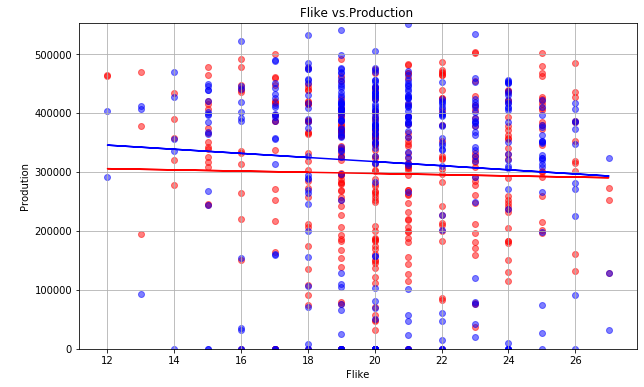

In [75]:
x_values = grouped_data["FLike"]
y_values = grouped_data["Product_A"]
z_values = grouped_data["Product_B"]
scatter_plot(x_values,y_values,z_values)
plt.title(f"Flike vs.Production ")
plt.xlabel("Flike")
plt.ylabel("Prodution")
plt.show()

## What are the main climate variables that affect the energy consumption?

In [88]:
# José/Jorge

In [5]:
# Graficar devices VS climate

## How is it correlated the production and the energy consumption?

In [81]:
# Luis

In [6]:
# Graficas de scatter, correlación y regresión

## Define the energy consumption curve for each month of the year. 

In [82]:
# Luis

## Define the energy consumption curve for each season of the year.

In [83]:
# Lupita

## For each group of devices, rank them by cost.


In [84]:
# Lupita

## Anual base line for each device.  

In [89]:
# Daniel

## Make production recommendations, based on the optimal production. 

In [86]:
# Daniel